## 데이터 전처리

#### 정의
- 데이터 분석 성능 향상을 위해 데이터 수정하거나 형태를 변형하는 작업
- DATA PREPROCESSING

### 데이터 전처리 종류 - 아래 4가지는 전처리의 필수로 생각해야 함

- 데이터 크리닝 - 결측치, 틀린 값 처리
- 스케일링 : 여러 변수 (피처) 값의 범위를 동등한 조건으로 맞추는 것
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 : 문자를 인산형 수치로 변환(카테고리 인코딩), 로그변환(데이터의 분포가 치우쳤을 때, 금액과 관계되는 특성)

## 데이터 클리닝

###  결측치 처리
- 값이 비어 있는 것을 처리하는 것 (파이썬에서는 빈 값이 nan으로 표시된다: not a number)
- 결측치를 처리하는 방법은 크게 세 가지가 있다
 - 결측치가 포함된 샘플(행)을 버린다
 - 결측치를 적절한 값으로 대체한다
 - 결측치 처리를 다음 분석 단계로 넘긴다. 즉, 결측치를 그대로 둔다
 
###  틀린값 처리
- 틀린값을 처리하는 방법도 결측치를 처리하는 방법과 같이 세가지이다
 - 틀린 값이 포함된 샘플(행)을 버린다
 - 틀린 값을 적절한 값으로 대체한다
 - 틀린값 처리를 다음 분석 단계로 넘긴다. 즉, 틀린값을 그대로 둔다


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# matplotlib를 이용하여 다양한 시각화 함수를 제공하는 라이브러리 seaborn
import seaborn as sns

### 난수 생성 (참고)

In [4]:
np.random.randint(10) # 0 부터 9까지 램덤 값
np.random.randint(5, 10) # 5 부터 9까지 램덤 값
np.random.randint(7, 10, size=5) # 7 부터 9까지 램덤 값 5개

3

6

array([9, 7, 7, 8, 8])

In [5]:
np.random.randn(5) # 0부터 1까지 난수 5개
np.random.randn(5).round(2) # 0부터 1까지 난수 5개 소수 둘째자리
np.random.randn(3,2).round(2)

array([-0.33420735,  0.21218244,  0.11885825,  2.07965436,  0.08901938])

array([-0.38, -0.13,  0.14, -1.23, -0.75])

array([[ 0.56, -1.77],
       [ 0.98,  2.42],
       [-0.76, -1.25]])

### 실습 데이터
- 키와 몸무게 데이터 생성
- 평균 170CM, 65KG, 표준편차 4CM, 5KG

In [46]:
4*np.random.randn(10).round(2)

array([-5.48, -0.16, -3.84, -4.76, -7.92, -0.08,  1.28,  0.2 ,  1.28,
       -0.56])

In [47]:
n_samples = 1000
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 4*np.random.randn(n_samples).round(2) + 65

df_raw = pd.DataFrame({'height' : height, 
                       'weight' : weight})

df_raw[:5]

,height,weight
0,167.84,59.72
1,174.92,66.16
2,170.36,65.76
3,174.20,64.36
4,172.88,55.20


In [48]:
# 원본보관
df = df_raw.copy()

<AxesSubplot:ylabel='Count'>

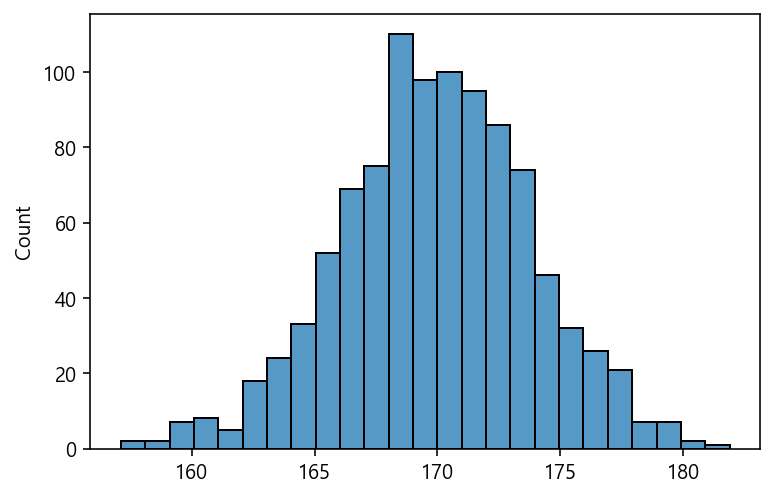

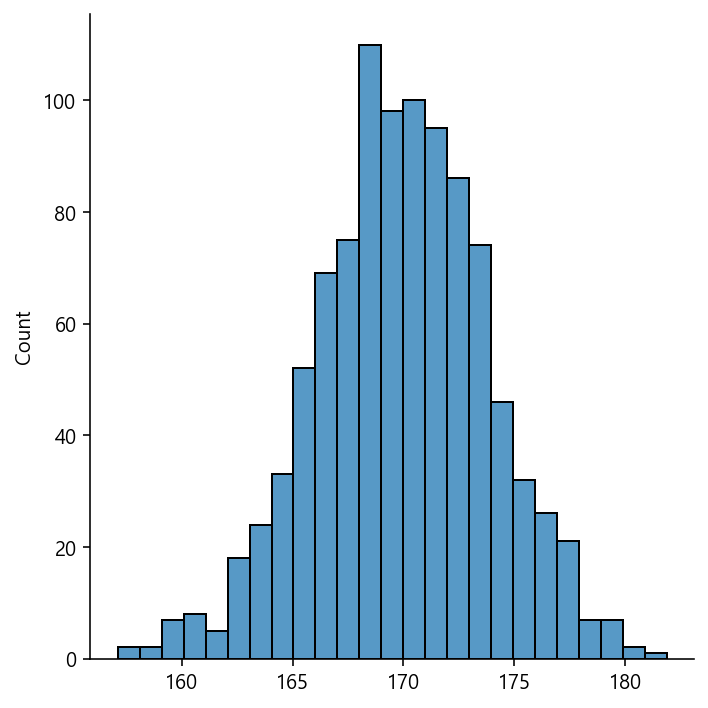

In [49]:
# 데이터 분포 확인 (확률 분포 근사 그래프 그리기)
sns.histplot(df.height.values)
sns.displot(df.height.values)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

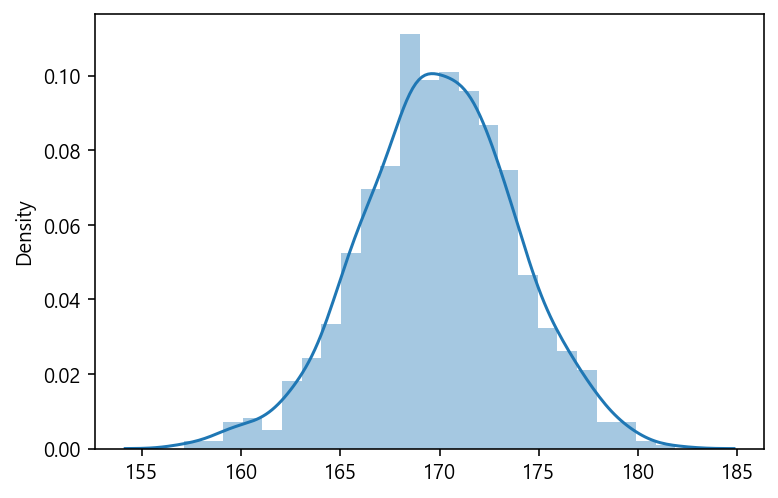

In [54]:
sns.distplot(df.height.values)

<AxesSubplot:ylabel='Count'>

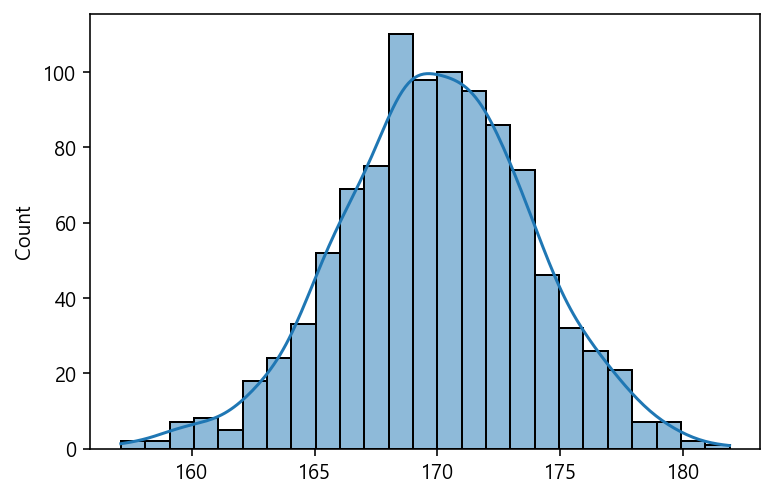

In [55]:
sns.histplot(df.height.values, kde=True)

### 결측치 처리 실슴
- 결측치 확인 : np.isnull() 사용
- 결측치 치환 : np.fillna() 사용

In [56]:
# 임의 값 하나를 결측치로 변경
df['weight'][2] = np.nan
df[:5]

,height,weight
0,167.84,59.72
1,174.92,66.16
2,170.36,NaN
3,174.20,64.36
4,172.88,55.20


In [57]:
# 컬럼별 결측치 갯수 보기
df.isnull().sum()

height    0
weight    1
dtype: int64

In [58]:
# 결측치가 있는 행(샘플, 레코드) 삭제하기 (df.dropna())
# 데이터가 충분해야 함 : 1000개 중 1개의 레코드에 결측치가 있으므로 삭제 가능
df2 = df.dropna()
df2.shape
df2[:5]

(999, 2)

,height,weight
0,167.84,59.72
1,174.92,66.16
3,174.20,64.36
4,172.88,55.20
5,170.40,63.72


In [59]:
# 결측치를 다른 값으로 대체하기
# 키와 몸무게는 평균치로 대체하는 것이 일반적

df3 = df.fillna(df['weight'].mean())
df3[:5]

,height,weight
0,167.84,59.720000
1,174.92,66.160000
2,170.36,64.943223
3,174.20,64.360000
4,172.88,55.200000


In [60]:
# 결측치 0으로 대체하는 경우
# 키나 몸무게는 함부로 0으로 대체하면 안됨
df.fillna(0)[:5]

,height,weight
0,167.84,59.72
1,174.92,66.16
2,170.36,0.00
3,174.20,64.36
4,172.88,55.20


In [61]:
# 결측치를 바로 이전/이후 값으로 대체할 수 있음
# 키나 몸무게 같은 데이터가 아닌 날씨와 관련된 시계열 데이터인 경우 많이 사용
# ffill(결측 이전 데이터) / bbfill(결측치 이후 데이터)
# 사용법 fillna(method='ffill')

df.fillna(method='ffill')[:5]

,height,weight
0,167.84,59.72
1,174.92,66.16
2,170.36,66.16
3,174.20,64.36
4,172.88,55.20


# 스케일링
- 여러 변수 값의 범위가 서로 다른 경우 데이터 분석에서 동일한 비중으로 반영하기 위해서는 동일한 범위를 갖도록 변환해야 한다 (예: 과목 성적 100점 만점으로 환산)
- 표준 스케일링을 가장 많이 사용한다 (평균이 0, 표준편차가 1이 되도록 변환) 
    - 표준 스케일링을 했다고 데이터 분포가 정규분포가 되지는 않는다. 데이터 분포의 형태는 그대로 유지하되 평균을 0 표준편차를 1로 환산하는 것 뿐이지 데이터의 shape을 변경시키지는 않으므로 정규분포화라고 표현하면 안됨
    - 과목간 편차가 있는경우 데이터가 외곡되므로 평균과 표준편차를 동일하게 환산
    - 국어의 평균은 90점에 모여있고 수학은 70점에 모여 있다면 그 두 과목을 그냥 처리하면 외곡됨
    - 수학은 편차가 크고 국어는 편차가 없으면 수학이 모든걸 좌우하는데 국어도 똑같은 비중으로 반영하게 하려면 퍼진정도를 맞춰줘야함
- 값의 최소치와 최대치가 정해진 경우는 min-max 스케링일도 자주 사용된다 (최소치를 0으로, 최대치를 1로)
    - 전압이 0-5 만 나온다면 min-max를 사용하기도 함

## 표준 스케일링


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-05%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%208.52.14.png?raw=1" width=140  align='left'>


In [18]:
# 키, 몸무게 데이터를 각각 표준 스케일링한 후 컬럼에 추가
# fit_transform () : 표준 스케일링을 구성해주는 함수
# 데이터프레임의 키와 몸무게 두 컬럼을 가지고 평균과 표준편차를 구하고 모든 데이터마다 평균을 빼서 표준편차로 나눠주는 작업을 수행
df = df_raw.copy() # 백업 데이터 사용 (결측치 없는)


In [62]:
from sklearn.preprocessing import StandardScaler #표준 스케일링

In [63]:
scale = StandardScaler() # 생성자 호출

In [64]:
df[['h_sc','w_sc']] = scale.fit_transform(df[['height', 'weight']])
df[:5]

,height,weight,h_sc,w_sc
0,167.84,59.72,-0.535494,-1.300332
1,174.92,66.16,1.275023,0.302919
2,170.36,NaN,0.108928,NaN
3,174.20,64.36,1.090903,-0.145195
4,172.88,55.20,0.753349,-2.425595


In [66]:
# scale 평균, scale의 표준편차
df['h_sc'].mean()
df['h_sc'].std()


4.674483022881759e-15

1.0005003753127746

### 데이터 분포 보기

<AxesSubplot:ylabel='Density'>

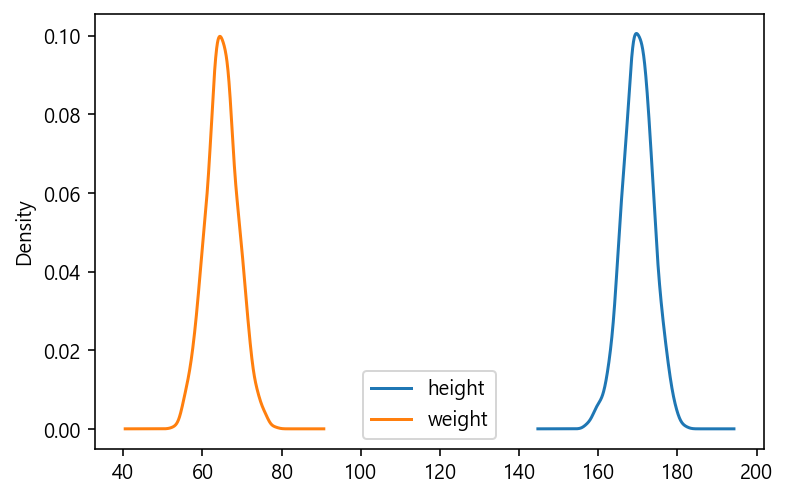

In [67]:
# 원래 키, 몸무게의 데이터의 확률 분포 보기 (kernel density estimate 함수 사용)
df[["height","weight"]].plot.kde() #히스토그램에 가장 근접한 확률분포함수를 이용한 그래프

<AxesSubplot:ylabel='Density'>

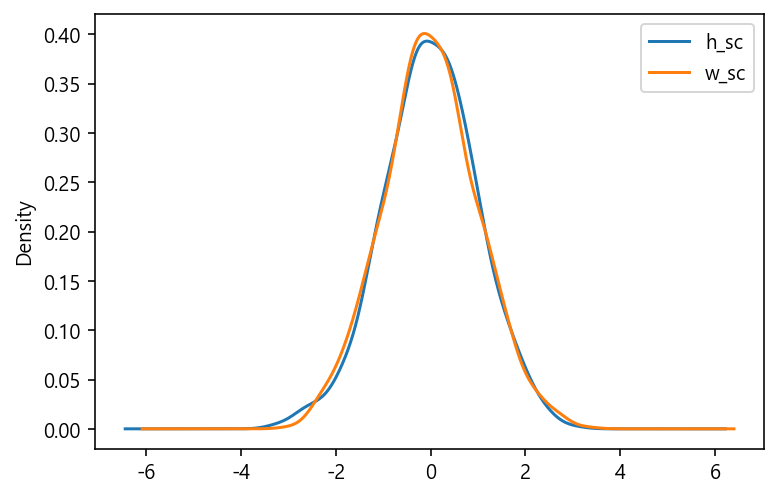

In [68]:
# 표준 스케일링된 데이터의 확률 분포 보기 - 정규분포로 생성했다
df[["h_sc","w_sc"]].plot.kde() #데이터의 평균이 1이고 표준편차가 0인 형태로 변환
# 키와 몸무게를 동일한 비중으로 사용하려면 값의 편차가 있으면 안된다


## Min-Max 스케일링
- 데이터의 최소값이 0, 최대값이 1이 되도록 조정


In [69]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df[['h_mima','w_mima']]=minmax.fit_transform(df[['height','weight']]) #0과 1사이의 값으로 치환
df[:5]

,height,weight,h_sc,w_sc,h_mima,w_mima
0,167.84,59.72,-0.535494,-1.300332,0.432956,0.266348
1,174.92,66.16,1.275023,0.302919,0.718901,0.523126
2,170.36,NaN,0.108928,NaN,0.534733,NaN
3,174.20,64.36,1.090903,-0.145195,0.689822,0.451356
4,172.88,55.20,0.753349,-2.425595,0.636511,0.086124


<AxesSubplot:ylabel='Density'>

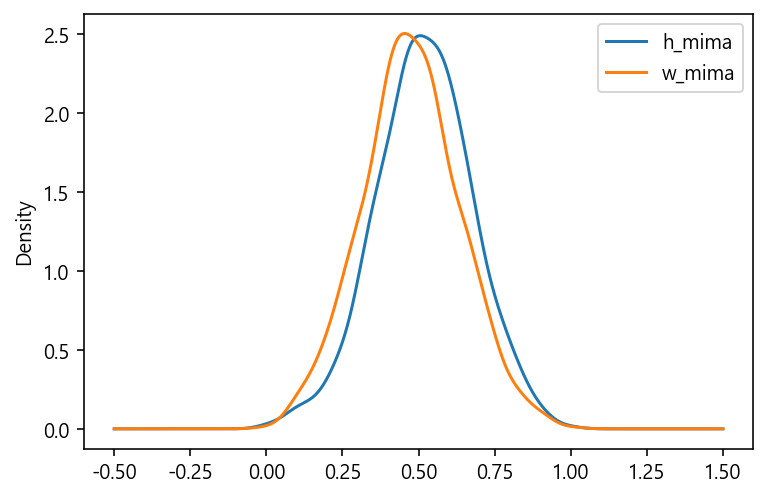

In [70]:
# min-max 스케일링 된 데이터의 확률 분포
df[["h_mima","w_mima"]].plot.kde()

# 0보다 적은 값이나 1보다 큰 값이 있어서 꼬리가 표현된 건 아님

- 위의 결과를 보면 표준 스케일링과 min-max 스케일링 별 차이가 없음
- 이상치가 있을 때는 두 스케일링 결과값의 변화 정도가 크게 달라짐

In [71]:
# 이상치가 포함된 키 데이터 생성: height_1
# 첫번째 샘플의 키 값을 임의로 2m로 변경 (200)
height_1 = height.copy()
height_1[0] = 200

In [72]:
df["height_1"] = height_1
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1
0,167.84,59.72,-0.535494,-1.300332,0.432956,0.266348,200.00
1,174.92,66.16,1.275023,0.302919,0.718901,0.523126,174.92
2,170.36,NaN,0.108928,NaN,0.534733,NaN,170.36


In [73]:
# 이상치가 포함된 데이터(컬럼)을 표준 스케일링을 적용
df['h_1_sc'] = scale.fit_transform(df[['height_1']])
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc
0,167.84,59.72,-0.535494,-1.300332,0.432956,0.266348,200.00,7.464161
1,174.92,66.16,1.275023,0.302919,0.718901,0.523126,174.92,1.231145
2,170.36,NaN,0.108928,NaN,0.534733,NaN,170.36,0.097869


<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

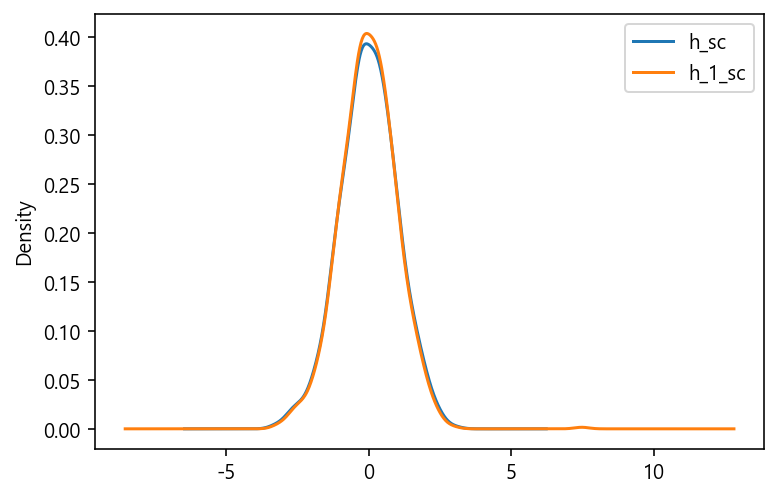

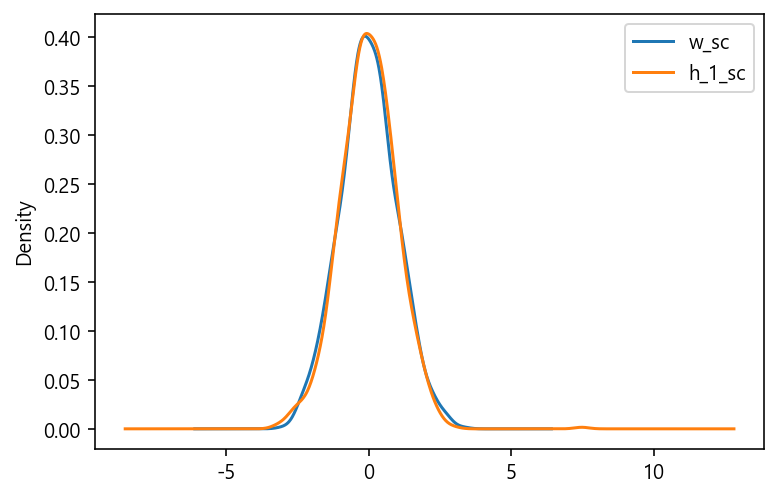

In [74]:
# 이상치가 있더라도 표준 스케일링의 분포는 변화가 거의 없음
# 한 두개의 이상치로 인해 전체 평균과 표준편차는 거의 변화지 않음
df[['h_sc','h_1_sc']].plot.kde()
df[['w_sc','h_1_sc']].plot.kde()

In [75]:
# 이상치가 있는 데이터에  min-max 스케일링을 적용
df['h_1_mima']=minmax.fit_transform(df[['height_1']])
df[:3] # 2m가 1이 되므로 나머지는 상대적으로 작아짐


,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc,h_1_mima
0,167.84,59.72,-0.535494,-1.300332,0.432956,0.266348,200.00,7.464161,1.000000
1,174.92,66.16,1.275023,0.302919,0.718901,0.523126,174.92,1.231145,0.415112
2,170.36,NaN,0.108928,NaN,0.534733,NaN,170.36,0.097869,0.308769


<AxesSubplot:ylabel='Density'>

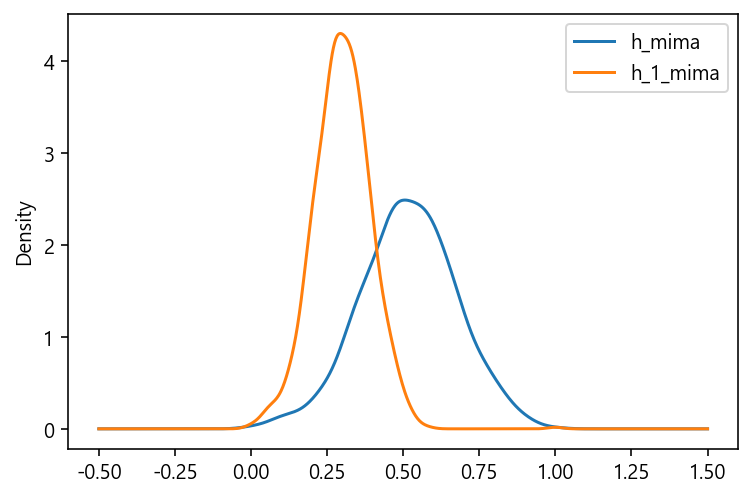

In [76]:
df[['h_mima','h_1_mima']].plot.kde()

# 정상값과 이상치포함값의 분포를 확인해보면 결과가 많이 달라짐 - 데이터분석시 입력값이 모두 달라진듯한 효과를 보인다
# 이상치가 들어오면 min_max인 경우에는 값이 달라질 수 있다는 것을 각오 하고 써야하며 
# 범위가 일정하다라는것이 명확하다면 편리하게 사용 가능

### 이상치 처리
- 경험이 필요함
- 이상치 처리의 목적은 두가지 이다
 - 1) 이상치를 제거하여 데이터 분석의 정확도를 높이려는 경우
 - 2) 이상치를 찾는 것 자체가 목적인 경우 (outlier detection)
     - 신용카드 사용 시 특이한 구매를 찾는경우
     - 기기 이상을 찾는 경우
 
- 아래는 모두 같은 상관계수를 같는 데이터 셋이다
    - 그러나 성격은 다르다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.47.02.png?raw=1" width=400 align='left'>


## 이상치 탐지
 - boxplot()을 보면 이상치 존재를 파악하기 쉽다
 - 표준 스케일링 한 후 값이 큰 것들 (예 6 이상)을 찾는 방법이 일반적이다


<AxesSubplot:>

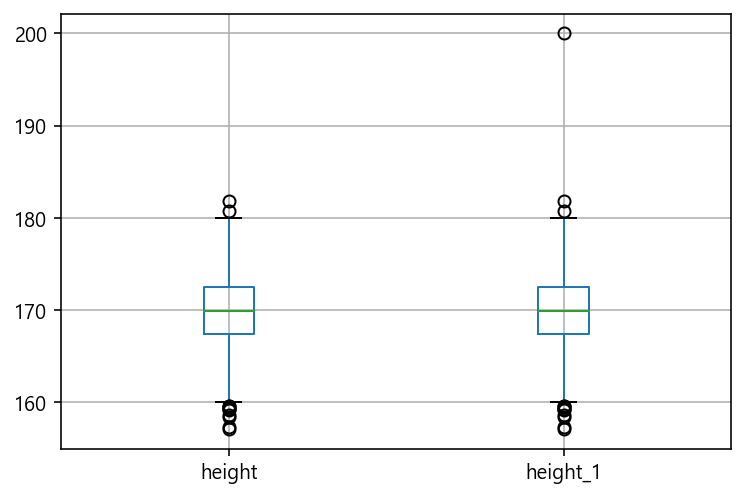

In [77]:
df[["height", "height_1"]].boxplot()

<AxesSubplot:>

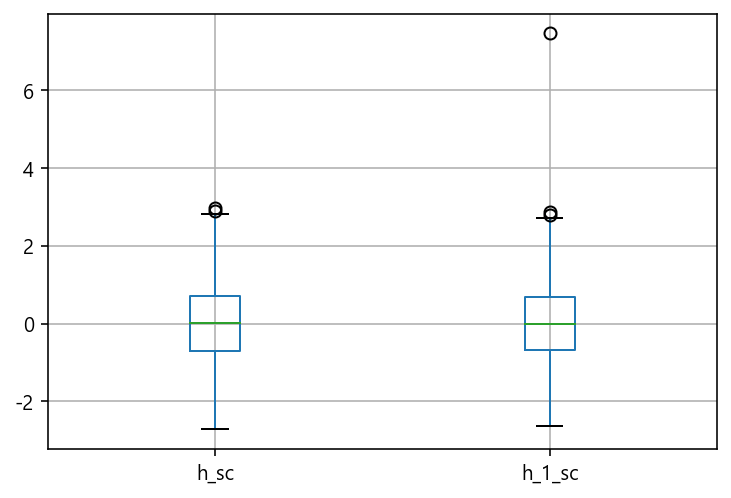

In [34]:
df[["h_sc", "h_1_sc"]].boxplot() # 키 2m인 사람은 7 시그만 밖에 존재

## 데이터 변환
### 로그 변환

- 어떤 변수는 로그를 취해야 입출력 관계에서 선형적인 변화(효과)를 표현하는 경우가 있다
- 예: 돈(수입/지출), 생물학적 자극과 반응 관계 (청각, 미각, 후각, 압력 등) 
- 소리가 작을 때는 조금만 커져도 변화를 느끼지만 소리가 큰 경우는 많이 커져야 변화를 느낄 수 있다
- 데이터 분석에서는 입출력 관계가 선형적일 때 가장 잘 예측할 수 있다 (선형적일수록 예측이 잘 된다)


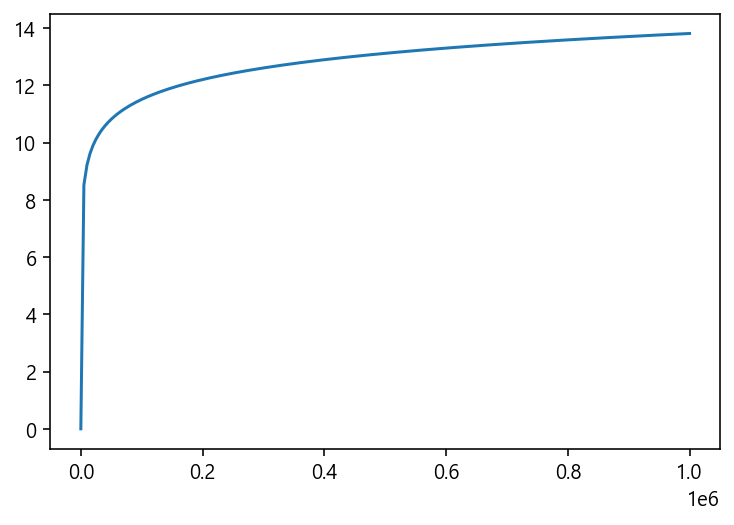

In [78]:
x = np.linspace(1, 1000000, 200)
y = np.log(x)

plt.plot(x,y)

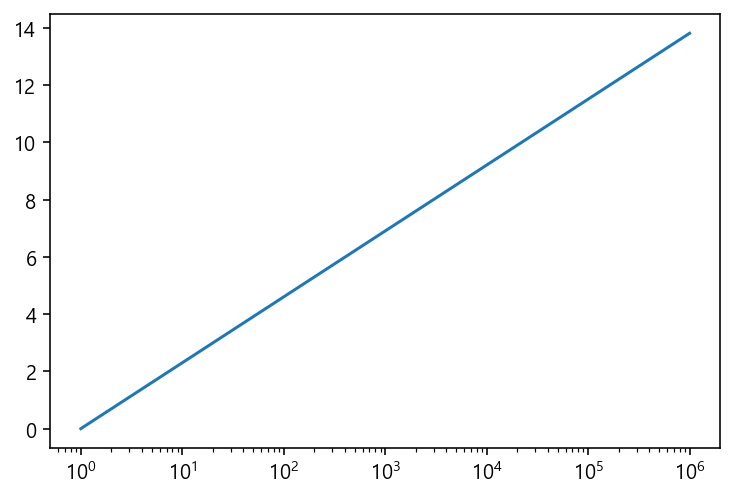

In [79]:
# x값에 로그를 취하면 x와 y의 관계가 선형적이 됨

plt.xscale('log')
plt.plot(x,y)

## 카테고리 인코딩

- 연속형 숫자 데이터를 카테고리형(범주형)으로 바꾸는 것
- 학생의 실력이 늘어나면 비례해서 용돈을 더 주기로 했을 때 학생의 실력이 얼마나 늘어났는지 두 학생의 차이가 어떤지 알고 싶을 때
- (예) 시험점수, 등수 차이만으로는 학생의 실력 차이를 파악하기 어렵다
 - 3점 차이
 - 3등 차이 : 450등과 453등 vs 1등과 4등
 - 3등급 차이 (등급 차이는 실력차이를 선형적으로 표현한다)

- 입력 값의 변화가 선형적(linear)인 효과를 나타낼 때 예측에 도움이 된다
- 내신성적 9등급제는 정규분포를 0.5 시그마 간격으로 (등간격으로) 나눈 것 (총 4.5 시그마 범위)
- 입력의 변화에 비례해서 출력을 예측하려면 변화가 선형적으로 효과적이어야 하는데 점수나 등수로는 부가정보(그전 등수, 전교생 수 등)를 줘야 하는데 등급을 사용하면 등급만으로 실력차나 실력 향상을 알 수 있다


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.48.55.png?raw=1" width=400 align='left'>


In [80]:
df

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc,h_1_mima
0,167.84,59.72,-0.535494,-1.300332,0.432956,0.266348,200.00,7.464161,1.000000
1,174.92,66.16,1.275023,0.302919,0.718901,0.523126,174.92,1.231145,0.415112
2,170.36,NaN,0.108928,NaN,0.534733,NaN,170.36,0.097869,0.308769
3,174.20,64.36,1.090903,-0.145195,0.689822,0.451356,174.20,1.052207,0.398321
4,172.88,55.20,0.753349,-2.425595,0.636511,0.086124,172.88,0.724153,0.367537
...,...,...,...,...,...,...,...,...,...
995,172.20,73.24,0.579458,2.065499,0.609047,0.805423,172.20,0.555156,0.351679
996,171.28,63.52,0.344193,-0.354314,0.571890,0.417863,171.28,0.326513,0.330224
997,167.88,61.80,-0.525265,-0.782512,0.434572,0.349282,167.88,-0.518474,0.250933
998,177.44,67.32,1.919445,0.591703,0.820679,0.569378,177.44,1.857429,0.473881


### 키의 등급 나누기
- 표준 편차를 기준으로 킬르 3개의 등급으로 나눔

In [81]:
df.loc[df['height']>=174, 'tall'] = 'large' # 처음으로 tall 컬럼이 생성되고 나머지 빈 곳은 NaN값
df.loc[(df['height']<174) & (df['height']>=166) , 'tall'] = 'standard'
df.loc[df['height']<166 , 'tall'] = 'small'

In [82]:
df.head()

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc,h_1_mima,tall
0,167.84,59.72,-0.535494,-1.300332,0.432956,0.266348,200.00,7.464161,1.000000,standard
1,174.92,66.16,1.275023,0.302919,0.718901,0.523126,174.92,1.231145,0.415112,large
2,170.36,NaN,0.108928,NaN,0.534733,NaN,170.36,0.097869,0.308769,standard
3,174.20,64.36,1.090903,-0.145195,0.689822,0.451356,174.20,1.052207,0.398321,large
4,172.88,55.20,0.753349,-2.425595,0.636511,0.086124,172.88,0.724153,0.367537,standard


In [83]:
# tall 컬럼(카테고리 데이터) 구성비
df['tall'].value_counts()

standard    709
small       150
large       141
Name: tall, dtype: int64

In [84]:
# 구성 비율
df['tall'].value_counts() / len(df) *100

standard    70.9
small       15.0
large       14.1
Name: tall, dtype: float64

### 원 핫 인코딩
- 카테고리 변수는 일반적으로 원핫(one-hot) 인코딩으로 표현해야 계산에 사용하기 쉽다
 - 데이터 분석에서는 모든 카테고리 데이터('large', 'standard' 등)를 숫자로 바뀌어야 한다
- pd.get_dummies() 사용

In [85]:
## 카테고리 변수를 df로 생성후 결과를 반환
df_tail = pd.get_dummies(df['tall'])
df_tail[:5]

,large,small,standard
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [86]:
# dummy 변수 합치기 (가로방향)
df_all = pd.concat((df, df_tail), axis=1)
df_all

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc,h_1_mima,tall,large,small,standard
0,167.84,59.72,-0.535494,-1.300332,0.432956,0.266348,200.00,7.464161,1.000000,standard,0,0,1
1,174.92,66.16,1.275023,0.302919,0.718901,0.523126,174.92,1.231145,0.415112,large,1,0,0
2,170.36,NaN,0.108928,NaN,0.534733,NaN,170.36,0.097869,0.308769,standard,0,0,1
3,174.20,64.36,1.090903,-0.145195,0.689822,0.451356,174.20,1.052207,0.398321,large,1,0,0
4,172.88,55.20,0.753349,-2.425595,0.636511,0.086124,172.88,0.724153,0.367537,standard,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,172.20,73.24,0.579458,2.065499,0.609047,0.805423,172.20,0.555156,0.351679,standard,0,0,1
996,171.28,63.52,0.344193,-0.354314,0.571890,0.417863,171.28,0.326513,0.330224,standard,0,0,1
997,167.88,61.80,-0.525265,-0.782512,0.434572,0.349282,167.88,-0.518474,0.250933,standard,0,0,1
998,177.44,67.32,1.919445,0.591703,0.820679,0.569378,177.44,1.857429,0.473881,large,1,0,0


## 최종 사용 데이터 선택
- 여러 전처리된 데이터 컬럼 중에서 필요한 부부만 선택하여 최종 분석에 사용

In [87]:
# 분석에 사용할 컬럼 : 표준스케일링, 원한인코딩 컬럼
X = df_all[['h_sc', 'w_sc', 'large', 'small', 'standard']]
X[:5]

,h_sc,w_sc,large,small,standard
0,-0.535494,-1.300332,0,0,1
1,1.275023,0.302919,1,0,0
2,0.108928,NaN,0,0,1
3,1.090903,-0.145195,1,0,0
4,0.753349,-2.425595,0,0,1


### 정리
**원핫 인코딩 방식은 일반적으로 많이 사용하는 방식이지만, 피처가 너무 많아지면 차원이 늘어나서 모델의 성능이 떨어짐**